In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv('Data/Full Data/scores.csv')

C:\Users\david\AppData\Local\Temp\ipykernel_10752\188938750.py:1: DtypeWarning: Columns (32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/Full Data/scores.csv')


In [16]:
students = df['student_id'].sample(n = 5, random_state = 63).values

In [18]:
first_att = df[df['attempt'] == 1]

In [23]:
first_att.columns

Index(['book', 'release', 'chapter', 'page', 'chapter_number',
       'section_number', 'review_flag', 'institution_id', 'class_id',
       'student_id', 'item_id', 'item_type', 'response', 'prompt',
       'points_possible', 'points_earned', 'dt_submitted', 'completes_page',
       'attempt', 'user_agent', 'lrn_response_id', 'lrn_activity_reference',
       'lrn_question_reference', 'lrn_question_position', 'lrn_type',
       'lrn_dt_started', 'lrn_dt_saved', 'lrn_status', 'lrn_option_0',
       'lrn_option_1', 'lrn_option_2', 'lrn_option_3', 'lrn_option_4',
       'lrn_option_5', 'lrn_option_6', 'lrn_option_7', 'lrn_option_8',
       'lrn_option_9', 'lrn_option_10', 'lrn_option_11', 'chapter_topic',
       'page_topic'],
      dtype='object')

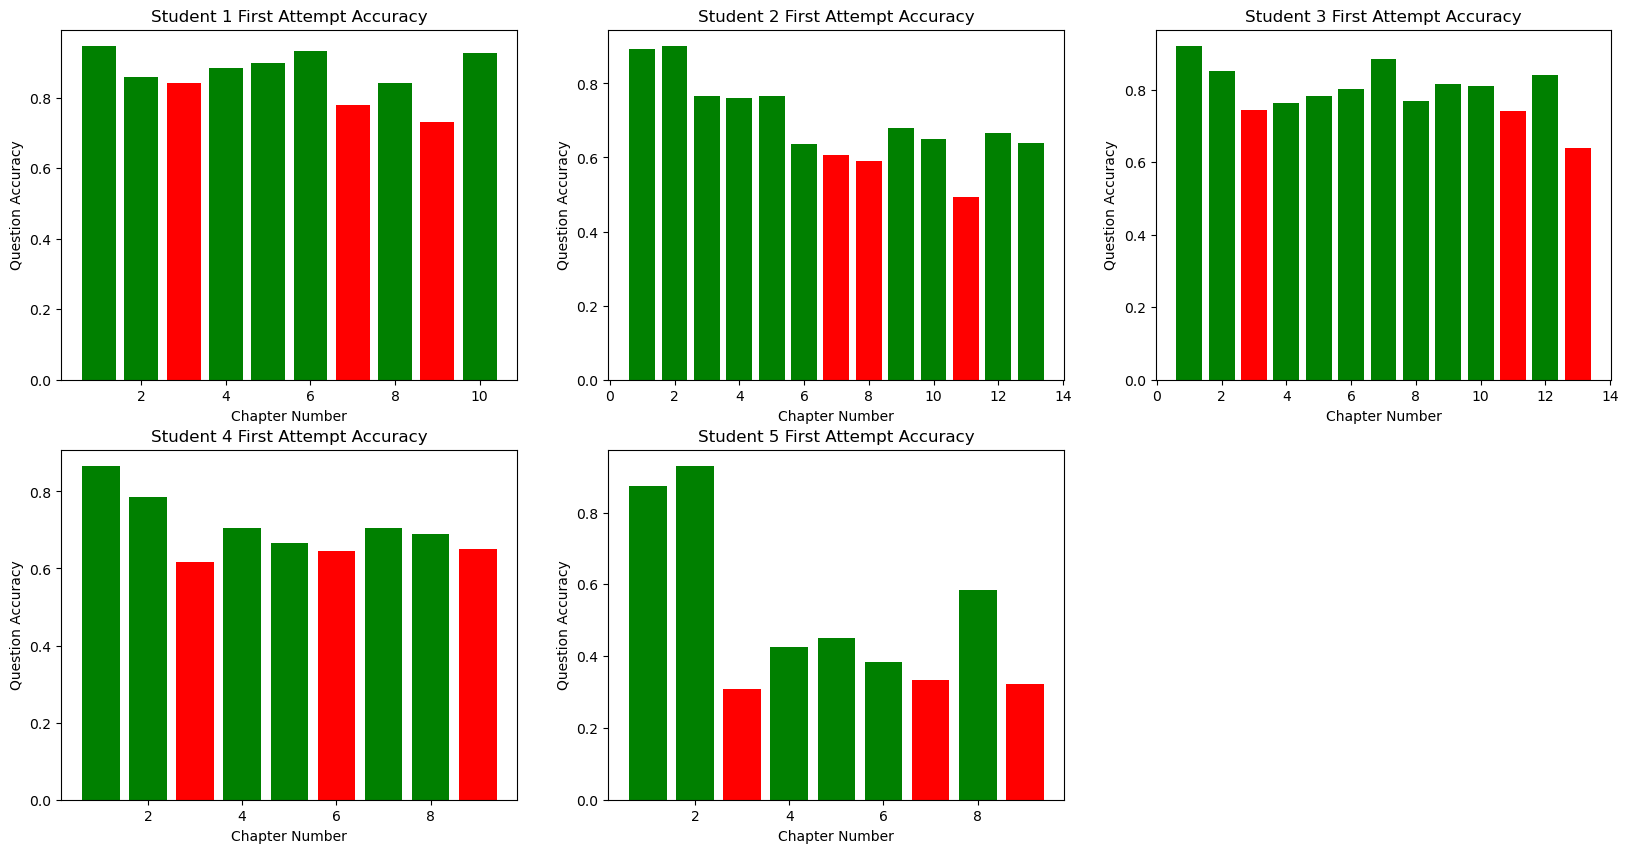

In [154]:
plt.figure(figsize = (20, 10))
for i, student in enumerate(students):
    plt.subplot(2, 3, i+1)
    chapters = first_att[first_att['student_id'] == student].groupby('chapter')
    chapter_scores = chapters['points_earned'].sum() / chapters['points_possible'].sum()
    chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_scores.index]
    chapter_scores.index = chapter_num
    chapter_scores.sort_index(inplace = True)
    
    thresh = chapter_scores.sort_values().values[2]
    
    colors = ['green' if value > thresh else 'red' for value in chapter_scores]
    
    plt.bar(range(1, len(chapter_scores) + 1), chapter_scores.values, color = colors)
    plt.xlabel('Chapter Number')
    plt.ylabel('Question Accuracy')
    plt.title(f"Student {i + 1} First Attempt Accuracy")
    
plt.show()

In [203]:
students

array(['6f7260a7-2017-4cbb-8dd8-f4b9528ac4ab',
       '1e6074a0-4b62-4bd6-8739-5e3edeb786a2',
       '5e58bf9c-c42f-4b31-b6b0-2a649913fc10',
       'e785ea7f-c08e-425f-82ae-2257adf89534',
       '94b84ed4-61ad-4364-b98a-926383362fb2'], dtype=object)

In [44]:
df.columns

Index(['book', 'release', 'chapter', 'page', 'chapter_number',
       'section_number', 'review_flag', 'institution_id', 'class_id',
       'student_id', 'item_id', 'item_type', 'response', 'prompt',
       'points_possible', 'points_earned', 'dt_submitted', 'completes_page',
       'attempt', 'user_agent', 'lrn_response_id', 'lrn_activity_reference',
       'lrn_question_reference', 'lrn_question_position', 'lrn_type',
       'lrn_dt_started', 'lrn_dt_saved', 'lrn_status', 'lrn_option_0',
       'lrn_option_1', 'lrn_option_2', 'lrn_option_3', 'lrn_option_4',
       'lrn_option_5', 'lrn_option_6', 'lrn_option_7', 'lrn_option_8',
       'lrn_option_9', 'lrn_option_10', 'lrn_option_11', 'chapter_topic',
       'page_topic'],
      dtype='object')

In [46]:
first_scs = df[df['points_possible'] == df['points_earned']]

In [175]:
def evaluate_student_by_attempts_til_correct(df, student_id):
    stud = df[df["student_id"] == student_id]

    stud["correct"] = (stud["points_earned"] == stud["points_possible"])
    correct_questions = stud[stud["correct"]]
    correct_questions = correct_questions[["chapter", "page_topic", "item_id", "prompt", "attempt"]]

    min_attempts = correct_questions.groupby(["item_id", "prompt", "page_topic"])["attempt"].min()
    
    average_attempts_by_topic = min_attempts.reset_index()
    
    # ["attempt"].mean()
    
    return average_attempts_by_topic

In [178]:
evaluate_student_by_attempts_til_correct(df, students[4])['attempt'].value_counts()

C:\Users\david\AppData\Local\Temp\ipykernel_10752\2022480447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud["correct"] = (stud["points_earned"] == stud["points_possible"])


1    166
2      4
3      1
Name: attempt, dtype: int64

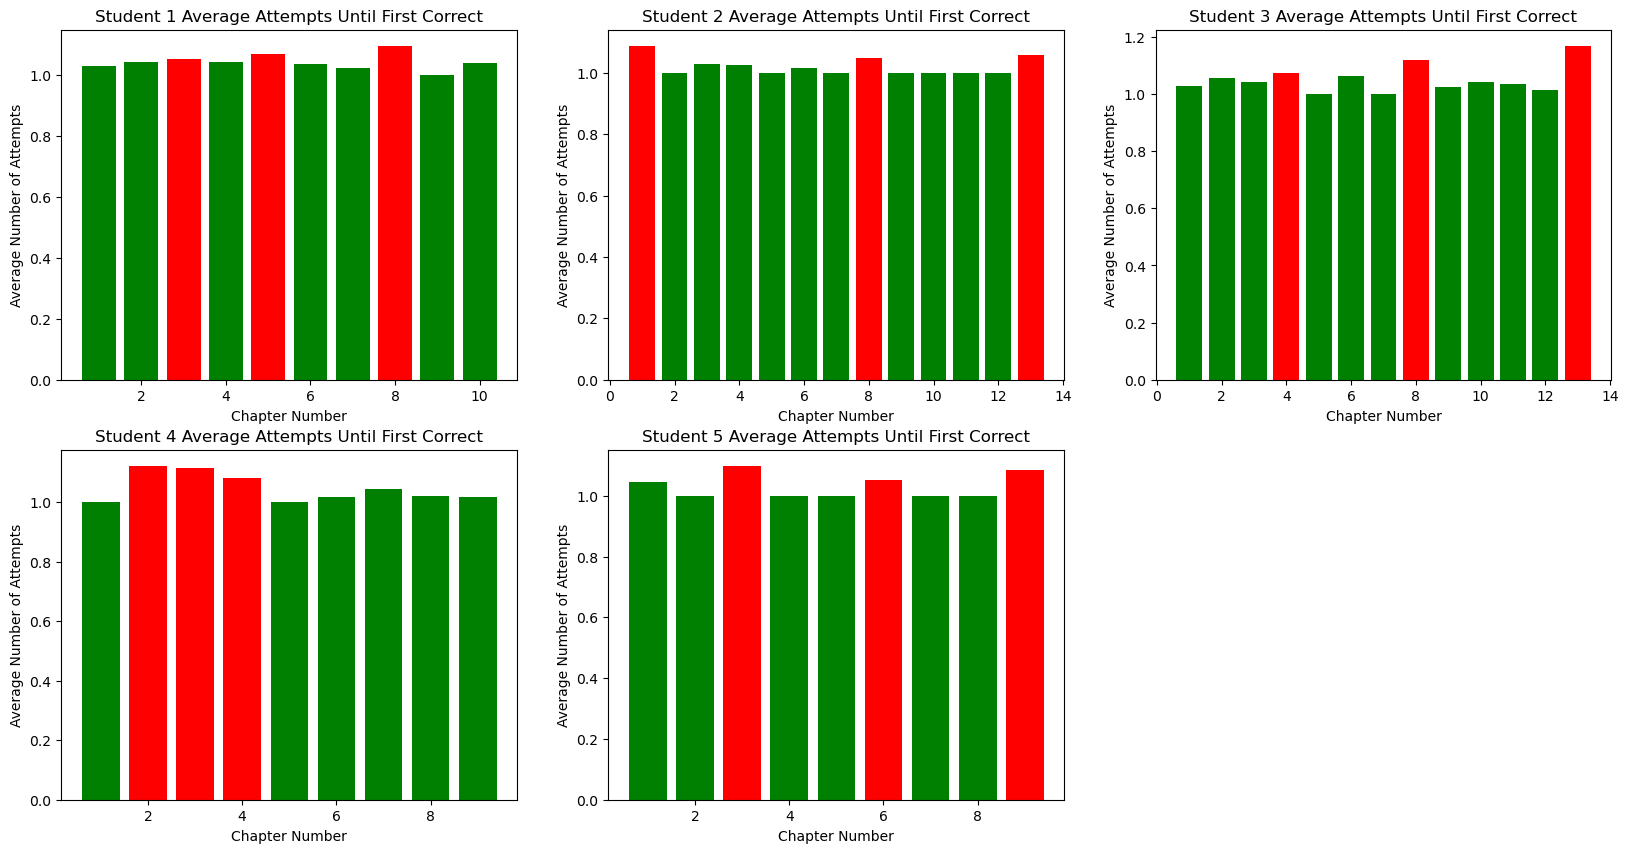

In [166]:
plt.figure(figsize = (20, 10))
for i, student in enumerate(students):
    plt.subplot(2, 3, i+1)
    chapter_attempts = first_scs[first_scs['student_id'] == student].groupby(['chapter', 'item_id', 'prompt', 'page_topic'])['attempt'].min()
    chapter_num = [int(re.findall('\d{1,2}', chapter[0])[0]) for chapter in chapter_attempts.index]
    chapter_attempts.index = chapter_num
    chapter_attempts.sort_index(inplace = True)
    
    chapter_avgs = chapter_attempts.groupby(level = 0).mean()

    thresh = chapter_avgs.sort_values().values[-3]
    
    colors = ['green' if value < thresh else 'red' for value in chapter_avgs]
    
    plt.bar(range(1, len(chapter_avgs) + 1), chapter_avgs.values, color = colors)
    plt.xlabel('Chapter Number')
    plt.ylabel('Average Number of Attempts')
    plt.title(f"Student {i + 1} Average Attempts Until First Correct")
    
plt.show()

In [ ]:
def evaluate_student_by_unanswered_questions(df, student_id):
    student_data = df[df['student_id'] == student_id]
    max_attempts = student_data.groupby('prompt')['attempt'].max().reset_index()
    max_attempts.rename(columns={'attempt': 'Max_Attempts'}, inplace=True)
    student_data = pd.merge(student_data, max_attempts, on = 'prompt', how = "left")
    student_data['unanswered'] = ((student_data['Max_Attempts'] == student_data['attempt']) & 
                (student_data['points_earned'] != student_data['points_possible'])).astype(int)
    topics_list = student_data.groupby('page_topic')['unanswered'].mean().sort_values(ascending=False) # actually gets the proportion
    return topics_list

In [206]:
student_data = df[df['student_id'] == students[0]]
max_attempts = student_data.groupby('prompt')['attempt'].max().reset_index()
max_attempts.rename(columns={'attempt': 'Max_Attempts'}, inplace=True)
student_data = pd.merge(student_data, max_attempts, on = 'prompt', how = "left")
student_data['unanswered'] = ((student_data['Max_Attempts'] == student_data['attempt']) & 
            (student_data['points_earned'] != student_data['points_possible'])).astype(int)
chapters_list = student_data.groupby('chapter')['unanswered'].mean().sort_values(ascending=False)

In [207]:
chapters_list

chapter
Chapter 9 - Models with a Quantitative Explanatory Variable    0.250000
Chapter 7 - Adding an Explanatory Variable to the Model        0.200000
Chapter 3 - Examining Distributions                            0.118280
Chapter 2 - Understanding Data                                 0.097561
Chapter 4 - Explaining Variation                               0.080357
Chapter 8 - Digging Deeper into Group Models                   0.074074
Chapter 6 - Quantifying Error                                  0.052632
Chapter 10 - The Logic of Inference                            0.035088
Chapter 5 - A Simple Model                                     0.031250
Chapter 1 - Welcome to Statistics: A Modeling Approach         0.024390
Name: unanswered, dtype: float64

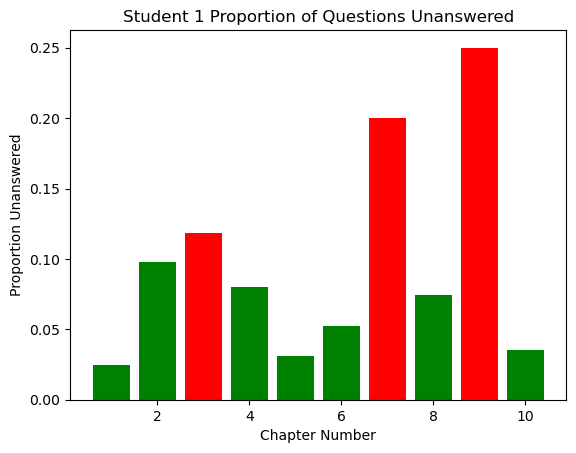

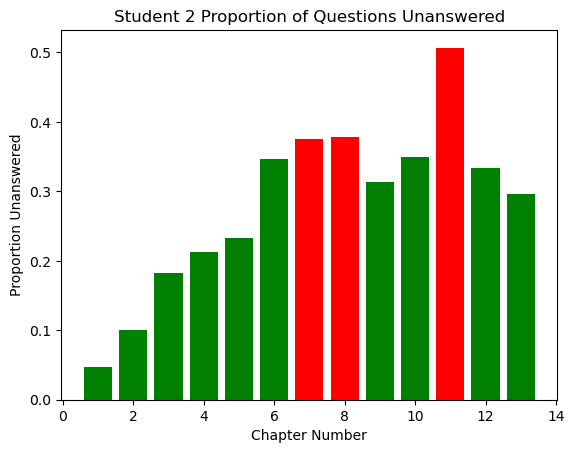

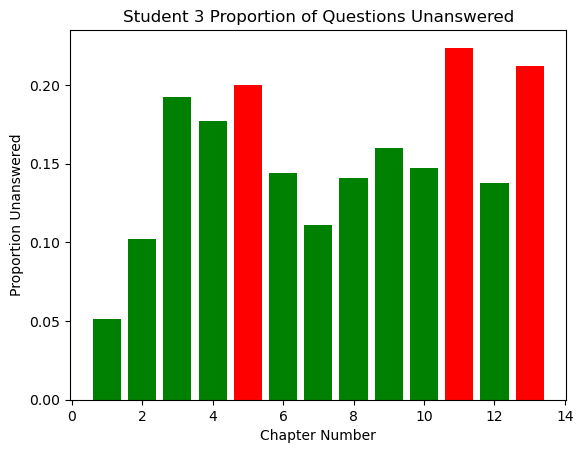

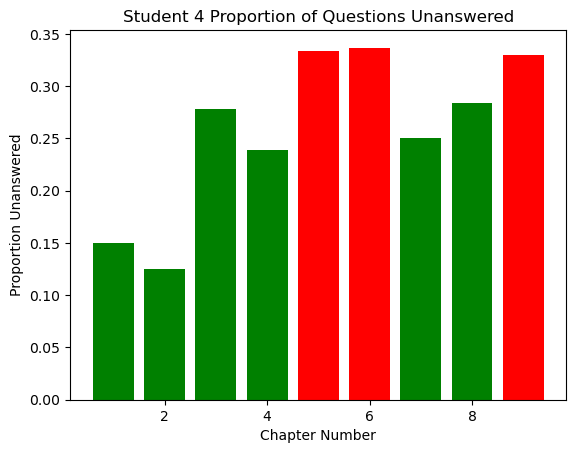

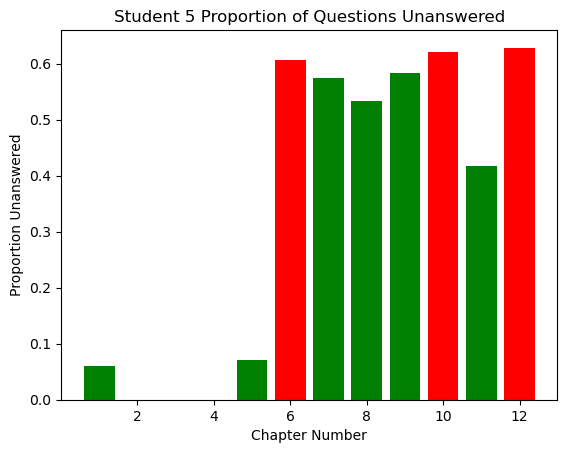

In [223]:
for i, student in enumerate(students):
    student_data = df[df['student_id'] == student]
    max_attempts = student_data.groupby('prompt')['attempt'].max().reset_index()
    max_attempts.rename(columns={'attempt': 'Max_Attempts'}, inplace=True)
    student_data = pd.merge(student_data, max_attempts, on = 'prompt', how = "left")
    student_data['unanswered'] = ((student_data['Max_Attempts'] == student_data['attempt']) & 
                (student_data['points_earned'] != student_data['points_possible'])).astype(int)
    chapter_prop = student_data.groupby('chapter')['unanswered'].mean().sort_values(ascending=False)
    
    chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_prop.index]
    chapter_prop.index = chapter_num
    chapter_prop.sort_index(inplace = True)
    
    thresh = chapter_prop.sort_values(ascending = False).values[2]
    
    colors = ['green' if value < thresh else 'red' for value in chapter_prop]
    
    plt.bar(chapter_prop.index, chapter_prop.values, color = colors)
    plt.xlabel('Chapter Number')
    plt.ylabel('Proportion Unanswered')
    plt.title(f"Student {i + 1} Proportion of Questions Unanswered")
    plt.show()

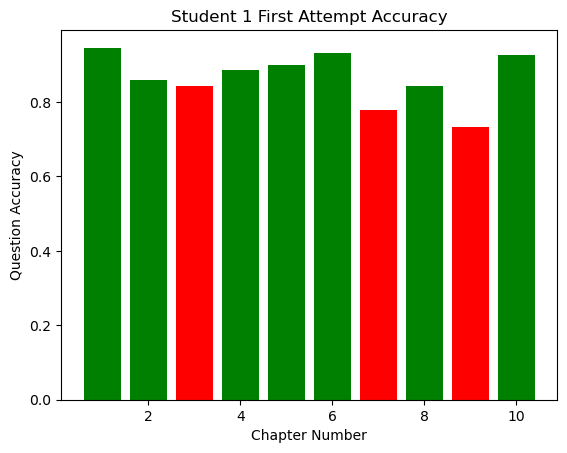

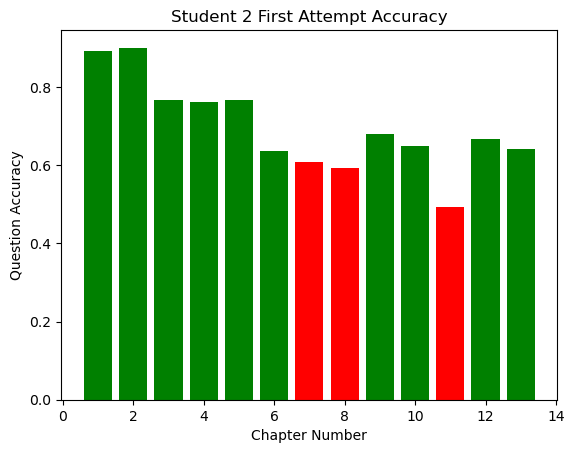

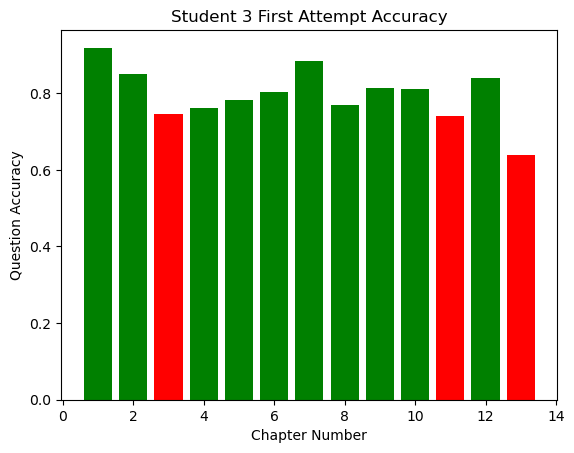

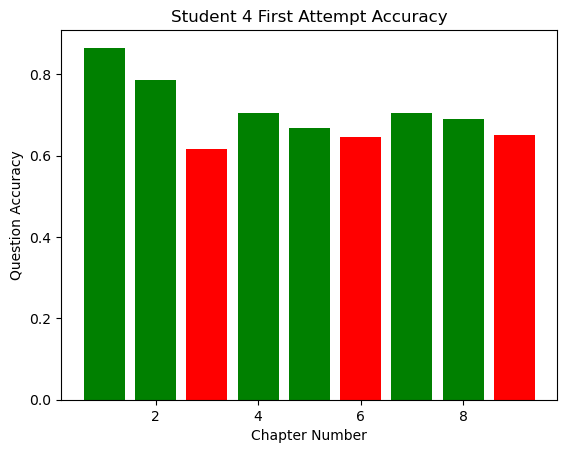

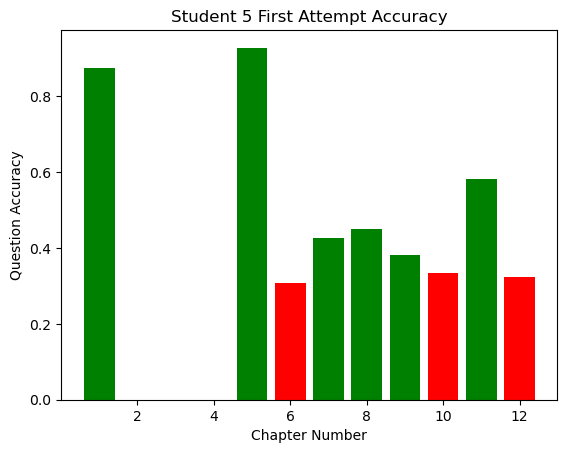

In [224]:
for i, student in enumerate(students):
    chapters = first_att[first_att['student_id'] == student].groupby('chapter')
    chapter_scores = chapters['points_earned'].sum() / chapters['points_possible'].sum()
    chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_scores.index]
    chapter_scores.index = chapter_num
    chapter_scores.sort_index(inplace = True)
    
    thresh = chapter_scores.sort_values().values[2]
    
    colors = ['green' if value > thresh else 'red' for value in chapter_scores]
    
    plt.bar(chapter_scores.index, chapter_scores.values, color = colors)
    plt.xlabel('Chapter Number')
    plt.ylabel('Question Accuracy')
    plt.title(f"Student {i + 1} First Attempt Accuracy")
    plt.show()

## Engagement Stuff

In [179]:
engagement = pd.read_csv('Data/Full Data/checkpoints_pulse.csv')

In [180]:
engagement.head()

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
0,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,10,Cost,NaN
1,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,11,Cost,NaN
2,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,12,Cost,NaN
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2,Cost,4.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,3,Cost,4.0


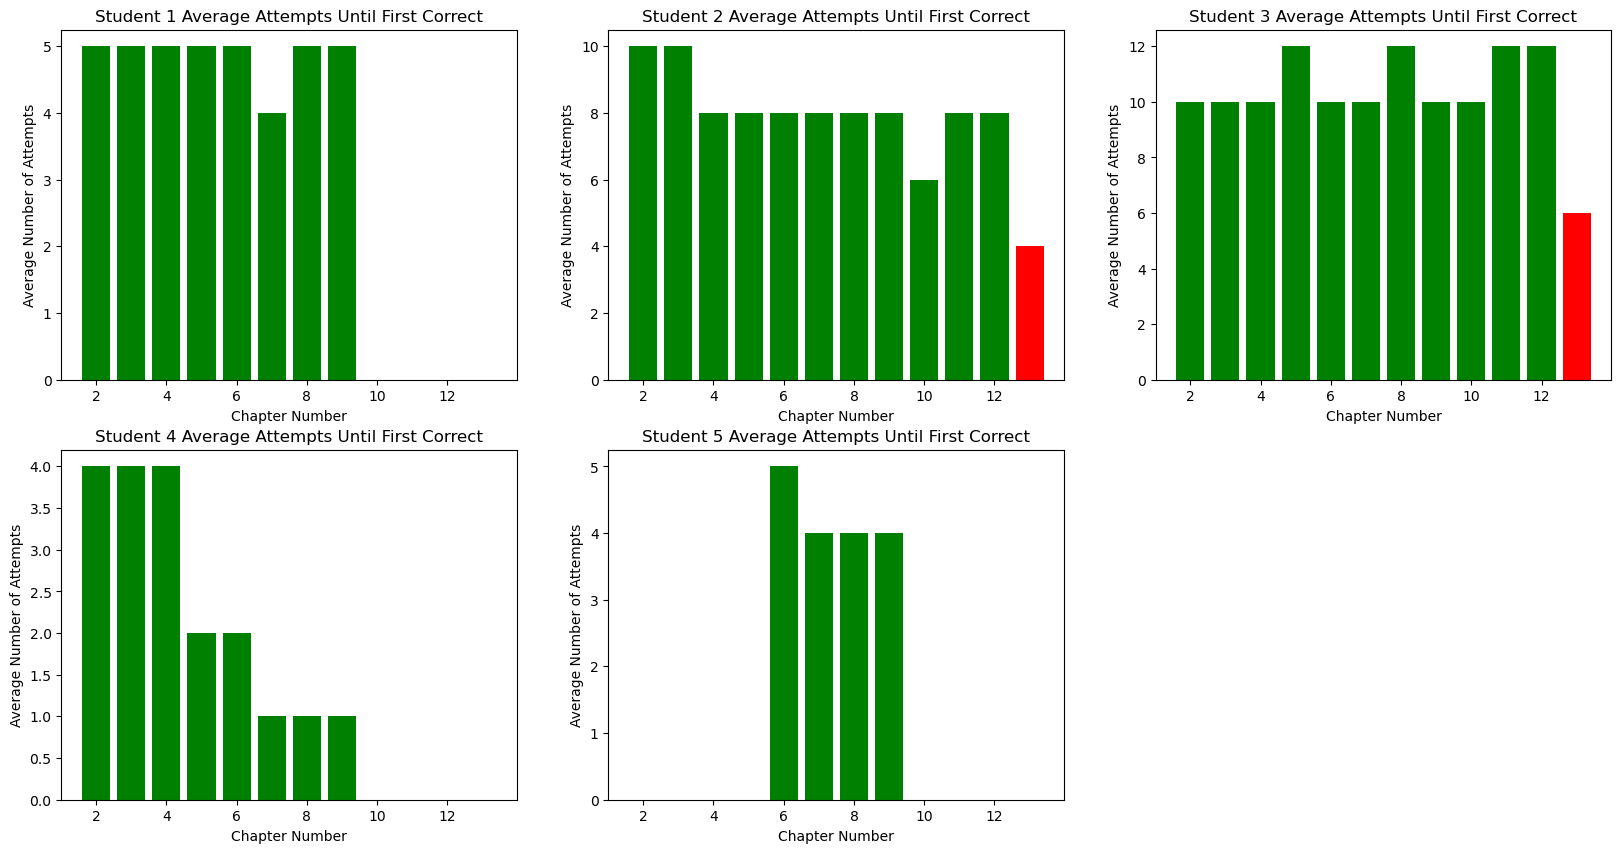

In [201]:
plt.figure(figsize = (20, 10))
for i, student in enumerate(students):
    plt.subplot(2, 3, i+1)
    utility = engagement[(engagement['student_id'] == student) & (engagement['construct'] == 'Utility Value')].groupby('chapter_number')['response'].sum()
    
    colors = ['green' if value > utility.min() else 'red' for value in utility]
    
    plt.bar(utility.index.values, utility.values, color = colors)
    plt.xlabel('Chapter Number')
    plt.ylabel('Utility Value Rating')
    plt.title(f"Student {i + 1} Utility Value Ratings")
    
plt.show()

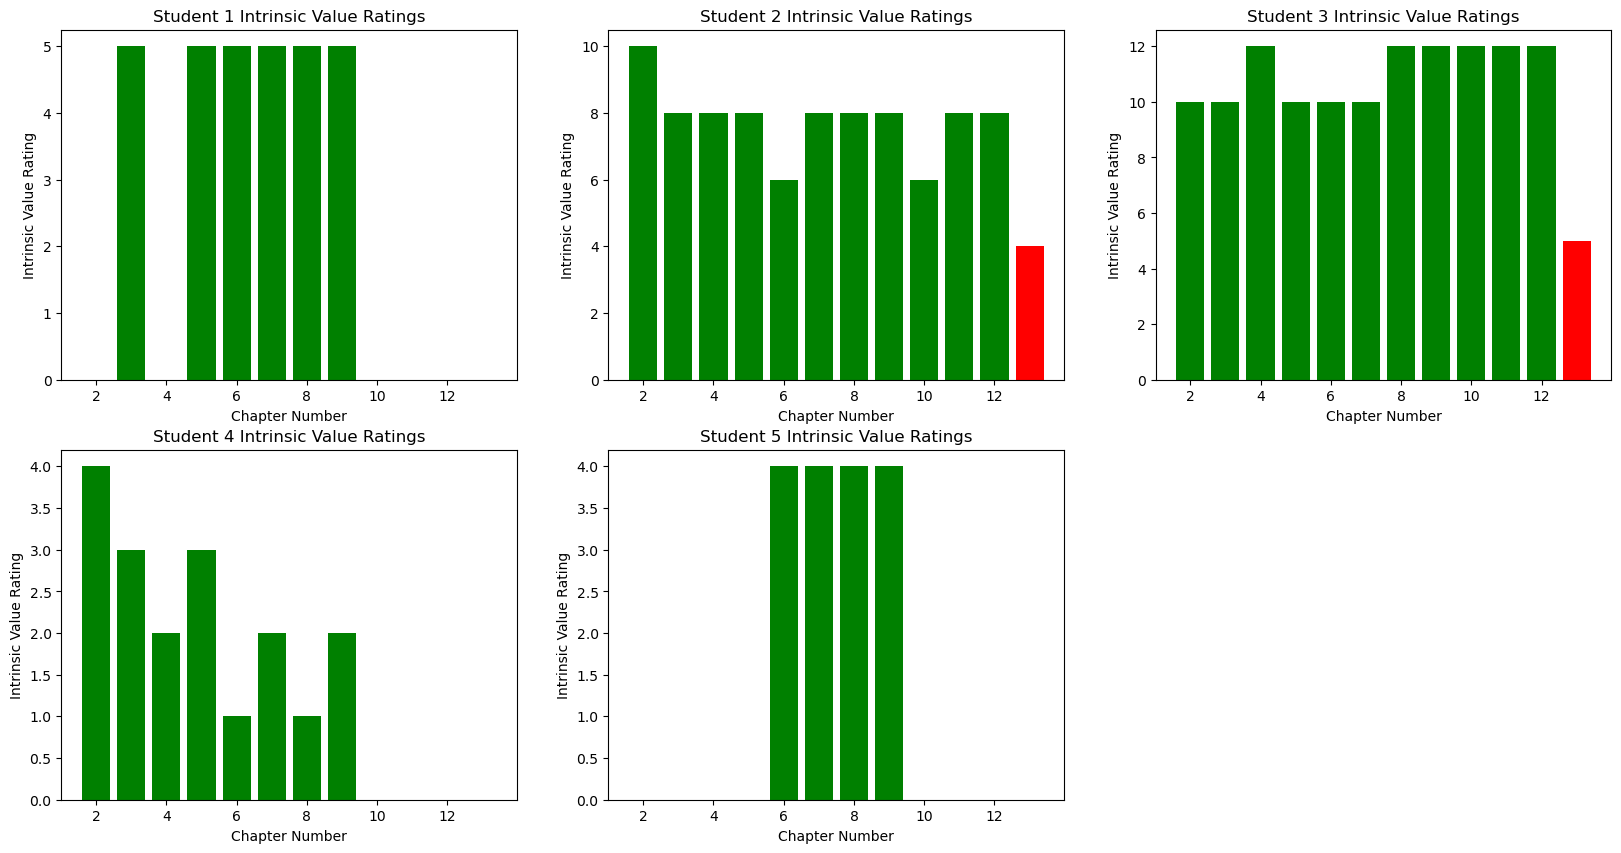

In [202]:
plt.figure(figsize = (20, 10))
for i, student in enumerate(students):
    plt.subplot(2, 3, i+1)
    intrinsic = engagement[(engagement['student_id'] == student) & (engagement['construct'] == 'Intrinsic Value')].groupby('chapter_number')['response'].sum()
    
    colors = ['green' if value > intrinsic.min() else 'red' for value in intrinsic]
    
    plt.bar(utility.index.values, intrinsic.values, color = colors)
    plt.xlabel('Chapter Number')
    plt.ylabel('Intrinsic Value Rating')
    plt.title(f"Student {i + 1} Intrinsic Value Ratings")
    
plt.show()